<a href="https://colab.research.google.com/github/Sheega-ameenah/Amina_Shiga/blob/main/ANN2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Creating Neural network for Regression problem**

In [40]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

In [41]:
import tensorflow as tf
from tensorflow import keras

In [42]:
from sklearn.datasets import fetch_california_housing
housing= fetch_california_housing()

In [43]:
housing.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [44]:
from sklearn.model_selection import train_test_split
X_train_full, X_test, y_train_full ,y_test = train_test_split(housing.data, housing.target,random_state=42)
X_train,X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)

In [45]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X_train= scaler.fit_transform(X_train)
X_valid= scaler.transform(X_valid)
X_test= scaler.transform(X_test)


In [46]:
np.random.seed(42)
tf.random.set_seed(42)

In [47]:
X_train.shape

(11610, 8)

In [48]:
model= keras.models.Sequential([
    keras.layers.Dense(30, activation='relu', input_shape=[8]),
    keras.layers.Dense(30, activation='relu'),
    keras.layers.Dense(1)
])

In [49]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 30)                270       
                                                                 
 dense_9 (Dense)             (None, 30)                930       
                                                                 
 dense_10 (Dense)            (None, 1)                 31        
                                                                 
Total params: 1231 (4.81 KB)
Trainable params: 1231 (4.81 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [50]:
model.compile(loss='mean_squared_error',
              optimizer= keras.optimizers.SGD(learning_rate=1e-3),
              metrics= ['mae'])

In [51]:
model_history= model.fit(X_test,y_test, epochs=20, validation_data=(X_valid,y_valid))

Epoch 1/20
162/162 [==============================] - 1s 5ms/step - loss: 3.1585 - mae: 1.3827 - val_loss: 9.0979 - val_mae: 1.0263
Epoch 2/20
162/162 [==============================] - 1s 4ms/step - loss: 1.4387 - mae: 0.8655 - val_loss: 7.6059 - val_mae: 0.8417
Epoch 3/20
162/162 [==============================] - 1s 4ms/step - loss: 0.9692 - mae: 0.7398 - val_loss: 5.1587 - val_mae: 0.7451
Epoch 4/20
162/162 [==============================] - 0s 3ms/step - loss: 0.8060 - mae: 0.6762 - val_loss: 3.3300 - val_mae: 0.6858
Epoch 5/20
162/162 [==============================] - 0s 3ms/step - loss: 0.7342 - mae: 0.6417 - val_loss: 2.0732 - val_mae: 0.6481
Epoch 6/20
162/162 [==============================] - 1s 4ms/step - loss: 0.6982 - mae: 0.6213 - val_loss: 1.4210 - val_mae: 0.6247
Epoch 7/20
162/162 [==============================] - 0s 3ms/step - loss: 0.6754 - mae: 0.6073 - val_loss: 1.0462 - val_mae: 0.6097
Epoch 8/20
162/162 [==============================] - 1s 4ms/step - loss: 0.

In [52]:
model_history.history

{'loss': [3.1585092544555664,
  1.4386922121047974,
  0.9691766500473022,
  0.805988073348999,
  0.7342073917388916,
  0.698209822177887,
  0.6754329800605774,
  0.6574462652206421,
  0.6417680382728577,
  0.6281777620315552,
  0.6150134205818176,
  0.6024608016014099,
  0.5911863446235657,
  0.5800749659538269,
  0.5693419575691223,
  0.5592616200447083,
  0.5498892664909363,
  0.5403672456741333,
  0.531215250492096,
  0.5222981572151184],
 'mae': [1.3827420473098755,
  0.8654869198799133,
  0.7397502064704895,
  0.6762366890907288,
  0.6416662335395813,
  0.6213262677192688,
  0.607287585735321,
  0.599269688129425,
  0.5902826189994812,
  0.5835242867469788,
  0.5766733884811401,
  0.5690244436264038,
  0.5656571984291077,
  0.5593792200088501,
  0.551768958568573,
  0.5480625629425049,
  0.5409446358680725,
  0.5362168550491333,
  0.5321086049079895,
  0.5266655087471008],
 'val_loss': [9.09789752960205,
  7.6059370040893555,
  5.15873384475708,
  3.3299660682678223,
  2.073245525

In [53]:
mae_test= model.evaluate(X_test, y_test)

162/162 [==============================] - 0s 2ms/step - loss: 0.5174 - mae: 0.5256


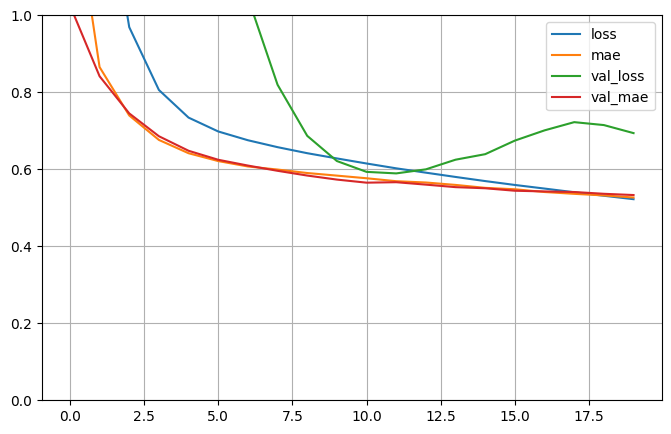

In [54]:
pd.DataFrame(model_history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [55]:
X_new= X_test[:3]

In [56]:
y_pred= model.predict(X_new)
print(y_pred)
print(y_test[:3])

1/1 [==============================] - 0s 58ms/step
[[1.0981588]
 [1.3824006]
 [2.911329 ]]
[0.477   0.458   5.00001]


**Using functional API for complex architectures**

In [74]:
del model

In [75]:
keras.backend.clear_session()

In [76]:
X_train.shape[:1]

(11610,)

In [77]:
input_= keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation= 'relu')(input_)
hidden2 = keras.layers.Dense(30, activation= 'relu')(hidden1)
concat = keras.layers.concatenate([input_, hidden2])
output = keras.layers.Dense(1)(concat)
model= keras.models.Model(inputs= [input_],outputs=[output])

In [78]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 8)]                  0         []                            
                                                                                                  
 dense (Dense)               (None, 30)                   270       ['input_1[0][0]']             
                                                                                                  
 dense_1 (Dense)             (None, 30)                   930       ['dense[0][0]']               
                                                                                                  
 concatenate (Concatenate)   (None, 38)                   0         ['input_1[0][0]',             
                                                                     'dense_1[0][0]']         

In [85]:
model.compile(loss= 'mean_squared_error',
            optimizer = keras.optimizers.SGD(learning_rate=1e-3),
              metrics= ['mae'])

In [89]:
model_history= model.fit(X_train,y_train, epochs=40, validation_data=(X_valid, y_valid))

Epoch 1/40
363/363 [==============================] - 2s 4ms/step - loss: 0.3803 - mae: 0.4401 - val_loss: 0.3899 - val_mae: 0.4322
Epoch 2/40
363/363 [==============================] - 1s 3ms/step - loss: 0.3791 - mae: 0.4390 - val_loss: 0.4134 - val_mae: 0.4366
Epoch 3/40
363/363 [==============================] - 1s 3ms/step - loss: 0.3777 - mae: 0.4389 - val_loss: 0.4105 - val_mae: 0.4326
Epoch 4/40
363/363 [==============================] - 1s 3ms/step - loss: 0.3762 - mae: 0.4375 - val_loss: 0.3925 - val_mae: 0.4338
Epoch 5/40
363/363 [==============================] - 1s 2ms/step - loss: 0.3754 - mae: 0.4370 - val_loss: 0.3759 - val_mae: 0.4300
Epoch 6/40
363/363 [==============================] - 1s 3ms/step - loss: 0.3737 - mae: 0.4362 - val_loss: 0.3961 - val_mae: 0.4300
Epoch 7/40
363/363 [==============================] - 1s 2ms/step - loss: 0.3731 - mae: 0.4353 - val_loss: 0.3866 - val_mae: 0.4297
Epoch 8/40
363/363 [==============================] - 1s 3ms/step - loss: 0.

In [90]:
model_history.history

{'loss': [0.3802521526813507,
  0.3791046738624573,
  0.37774771451950073,
  0.3761803209781647,
  0.37544727325439453,
  0.37371617555618286,
  0.373129278421402,
  0.3720165491104126,
  0.37087929248809814,
  0.36981722712516785,
  0.36920586228370667,
  0.3680713176727295,
  0.3672545254230499,
  0.3664596676826477,
  0.3656136989593506,
  0.3647648096084595,
  0.3640874922275543,
  0.36359700560569763,
  0.36263272166252136,
  0.3619610369205475,
  0.3611118793487549,
  0.3604487478733063,
  0.35969850420951843,
  0.35894307494163513,
  0.3581973910331726,
  0.35757696628570557,
  0.3573461174964905,
  0.3565399944782257,
  0.35604676604270935,
  0.355248361825943,
  0.35451602935791016,
  0.3540569543838501,
  0.3538733124732971,
  0.35314884781837463,
  0.3527648448944092,
  0.35234031081199646,
  0.35195571184158325,
  0.35145896673202515,
  0.3509875237941742,
  0.3503880202770233],
 'mae': [0.4401235580444336,
  0.43903836607933044,
  0.4388572573661804,
  0.43754294514656067,

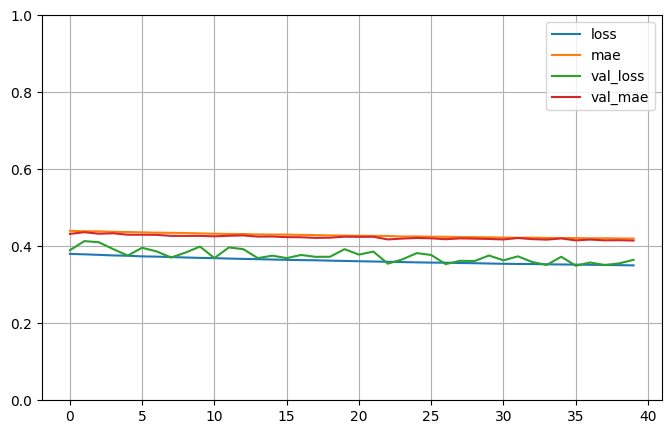

In [91]:
pd.DataFrame(model_history.history).plot(figsize= (8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()